In [75]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from matplotlib.colors import ListedColormap 
import numbers

In [76]:
rdfmt = json.load(open('../data/rdfmt.json'))

# GET DBPEDIA & WIKIDATA

In [109]:
endpoint = 'http://node1.research.tib.eu:4001/sparql'
query = 'SELECT DISTINCT ?class WHERE {?s a ?class. filter strStarts(str(?class), "http://dbpedia.org/")}'

edpoint_wd = 'http://node3.research.tib.eu:4010/sparql'
query_wd = 'SELECT DISTINCT ?class ?clabel WHERE {?s <http://www.wikidata.org/prop/direct/P31> ?class. ?class rdfs:label ?clabel . FILTER langMatches( lcase(lang(?clabel)), "en" )} LIMIT 10000'

In [112]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper(edpoint_wd)
sparql.setQuery(query_wd)
sparql.setReturnFormat(JSON)
try:
    result = sparql.query().convert()
except:
    print query
    result = []

{u'head': {u'link': [], u'vars': [u'class', u'clabel']}, u'results': {u'distinct': False, u'bindings': [{u'class': {u'type': u'uri', u'value': u'http://www.wikidata.org/entity/Q3624078'}, u'clabel': {u'xml:lang': u'en', u'type': u'literal', u'value': u'sovereign state'}}, {u'class': {u'type': u'uri', u'value': u'http://www.wikidata.org/entity/Q3624078'}, u'clabel': {u'xml:lang': u'en-ca', u'type': u'literal', u'value': u'sovereign state'}}, {u'class': {u'type': u'uri', u'value': u'http://www.wikidata.org/entity/Q3624078'}, u'clabel': {u'xml:lang': u'en-gb', u'type': u'literal', u'value': u'sovereign state'}}, {u'class': {u'type': u'uri', u'value': u'http://www.wikidata.org/entity/Q178561'}, u'clabel': {u'xml:lang': u'en', u'type': u'literal', u'value': u'battle'}}, {u'class': {u'type': u'uri', u'value': u'http://www.wikidata.org/entity/Q178561'}, u'clabel': {u'xml:lang': u'en-gb', u'type': u'literal', u'value': u'battle'}}, {u'class': {u'type': u'uri', u'value': u'http://www.wikidata.o

In [115]:

    
res = []
for r in result["results"]["bindings"]:
    res.append([r['class']['value'], r['clabel']['value']])

In [117]:
print res

[[u'http://www.wikidata.org/entity/Q3624078', u'sovereign state'], [u'http://www.wikidata.org/entity/Q3624078', u'sovereign state'], [u'http://www.wikidata.org/entity/Q3624078', u'sovereign state'], [u'http://www.wikidata.org/entity/Q178561', u'battle'], [u'http://www.wikidata.org/entity/Q178561', u'battle'], [u'http://www.wikidata.org/entity/Q4663903', u'Wikimedia portal'], [u'http://www.wikidata.org/entity/Q4663903', u'Wikipedia:Portal'], [u'http://www.wikidata.org/entity/Q4663903', u'Wikipedia:Portal'], [u'http://www.wikidata.org/entity/Q29654714', u'national motto'], [u'http://www.wikidata.org/entity/Q26884324', u'Wikimedia outline article'], [u'http://www.wikidata.org/entity/Q8142', u'currency'], [u'http://www.wikidata.org/entity/Q8142', u'currency'], [u'http://www.wikidata.org/entity/Q8142', u'Currency'], [u'http://www.wikidata.org/entity/Q4167836', u'Wikimedia category'], [u'http://www.wikidata.org/entity/Q4167836', u'Wikimedia category'], [u'http://www.wikidata.org/entity/Q4167

In [118]:
len(res)

with open("../data/all-classes-wikidata.csv", "wb") as f:
    writer = csv.writer(f)
    for val in [unicode(s).encode("utf-8") for s in res]:
         writer.writerow(val)

In [72]:
dbpediaClasses = []
with open("../data/all-classes-dbpedia.csv") as infile:
    for line in infile:
        line = line.split(',')[0]
        if line and not 'yago' in line.lower():
            dbpediaClasses.append(line.strip())

In [74]:
json.dump(dbpediaClasses, open('../data/classes-dbpedia.json', 'w'))

# General Statistics

In [78]:
classes = json.load(open('../data/classes.json'))

In [79]:
classes_numbers = len(classes)
print classes_numbers

32


In [80]:
total_numbers = {}

for cl, x in rdfmt.iteritems():
    for metric, data in x.iteritems():
        if metric == 'languages_share':
            if not data:
                continue
            if metric in total_numbers:
                total_numbers[metric].update(data.keys())
            else:
                total_numbers[metric] = set()
                for k,v in data.iteritems():
                    total_numbers[metric].add(k)
            continue
        if not data:
            data = 0
        if metric in total_numbers:
            total_numbers[metric].append(data)
        else:
            total_numbers[metric] = [data]

res = {}
for metric, num in total_numbers.iteritems():
    if metric == 'languages_share':
        res[metric] = num
        continue
    res[metric] = np.mean(num)

for k,v in res.iteritems():
    print k,v

size_subjects 14534.1875
size_triples 1301743.90625
languages_share set([u'ru', u'fr', u'en', u'zh', u'pt', u'de', u'it', u'ar', u'es', u'nl', u'ja', u'pl'])
ds_size_triples 2792021675.0
ds_class_labeling 0.000981228580812953
entities_2_5_lang 0.39992335815538727
number_languages 9.4375
entities_11_50_lang 0.04406103788955947
unambiguity 1.0
subject_labeling 0.8184999836384756
entities_1_lang 0.4073928215128196
entities_50+_lang 0.0
entities_6_10_lang 0.11869683712487143


In [81]:
rdfmt_lang = {}
for cl, data in rdfmt.iteritems():
    for k,v in data['languages_share'].iteritems():
        if k:
            if cl in rdfmt_lang:
                rdfmt_lang[cl][k] = v
            else:
                rdfmt_lang[cl] = {}
                rdfmt_lang[cl][k] = v
#print rdfmt_lang

rdfmt_non_en = {}
for cl, data in rdfmt_lang.iteritems():
    for k,v in data.iteritems():
        if k != 'en' and k != 'en-us':
            if cl in rdfmt_non_en:
                rdfmt_non_en[cl][k] = v
            else:
                rdfmt_non_en[cl] = {}
                rdfmt_non_en[cl][k] = v

for x in rdfmt_non_en.keys():
    print x

http://dbpedia.org/ontology/Drug
http://dbpedia.org/ontology/Brain
http://dbpedia.org/ontology/Protein
http://dbpedia.org/ontology/Biomolecule
http://dbpedia.org/ontology/Nerve
http://dbpedia.org/ontology/Species
http://dbpedia.org/ontology/AnatomicalStructure
http://dbpedia.org/ontology/Hospital
http://dbpedia.org/ontology/ChemicalSubstance
http://dbpedia.org/ontology/ChemicalCompound
http://dbpedia.org/ontology/Fungus
http://dbpedia.org/ontology/Arachnid
http://dbpedia.org/ontology/Bone
http://dbpedia.org/ontology/Amphibian
http://dbpedia.org/ontology/Archaea
http://dbpedia.org/ontology/Bacteria
http://dbpedia.org/ontology/CelestialBody
http://dbpedia.org/ontology/Embryology
http://dbpedia.org/ontology/Fish
http://dbpedia.org/ontology/Artery
http://dbpedia.org/ontology/Vein
http://dbpedia.org/ontology/Lymph
http://dbpedia.org/ontology/Enzyme
http://dbpedia.org/ontology/Disease
http://dbpedia.org/ontology/Muscle


# Boxplots

In [84]:
res = {}

for cl, x in rdfmt.iteritems():
    for metric, data in x.iteritems():
        if not isinstance(data, numbers.Number) or not data <= 1:
            continue
        if metric == 'ds_class_labeling' or metric == 'number_languages' or metric == 'size_triples' or metric == 'size_subjects' or metric == 'entities_6_10_lang':
            continue
        if metric in res:
            res[metric].append(data)
        else:
            res[metric] = [data]
#print res

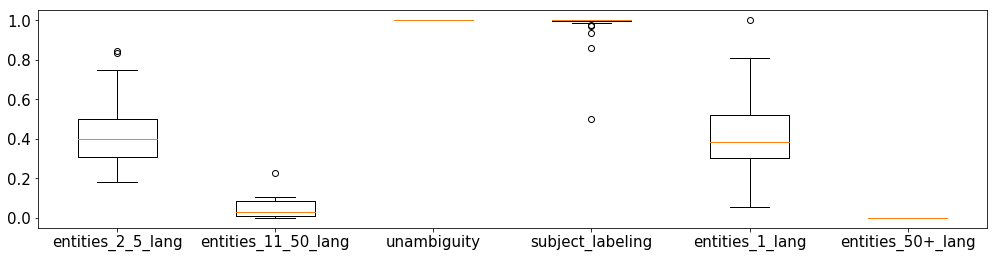

In [85]:
plt.rcParams.update({'font.size': 15})
fig = plt.gcf()
fig.set_size_inches(17, 4)
labels, d = res.keys(), res.values()
plt.boxplot(d)
plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig('boxplot.png')

In [ ]:
data_db = {}
for x in dbpedia_rdfmt.values():
    for metric, data in x.iteritems():
        if not isinstance(data, numbers.Number) or not data <= 1:
            continue
        if metric == 'ds_class_labeling' or metric == 'size_triples' or metric == 'size_subjects' or metric == 'entities_2_5_lang' or metric == 'entities_11_50_lang' or metric == 'entities_6_10_lang':
            continue
        if metric in data_db:
            data_db[metric].append(data)
        else:
            data_db[metric] = [data]

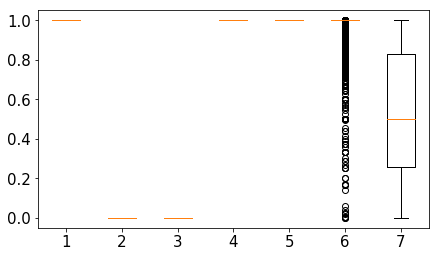

In [163]:
fig = plt.gcf()
fig.set_size_inches(7, 4)
labels, data = data_db.keys(), data_db.values()
plt.boxplot(data)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig('boxplot-dbpedia.pdf')

In [49]:
data_yago = {}
for x in yago_rdfmt.values():
    for metric, data in x.iteritems():
        if not isinstance(data, numbers.Number) or not data <= 1:
            continue
        if metric == 'size_subjects' or metric == 'entities_2_5_lang' or metric == 'entities_11_50_lang' or metric == 'entities_6_10_lang':
            continue
        if metric in data_yago:
            data_yago[metric].append(data)
        else:
            data_yago[metric] = [data]

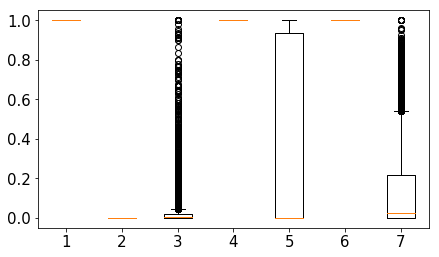

In [164]:
fig = plt.gcf()
fig.set_size_inches(7, 4)
labels, data = data_yago.keys(), data_yago.values()
plt.boxplot(data)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig('boxplot-yago.pdf')

In [52]:
data_mb = {}
for x in musicbrainz_rdfmt.values():
    for metric, data in x.iteritems():
        if not isinstance(data, numbers.Number) or not data <= 1:
            continue
        if metric == 'size_subjects' or metric == 'entities_2_5_lang' or metric == 'entities_11_50_lang' or metric == 'entities_6_10_lang':
            continue
        if metric in data_mb:
            data_mb[metric].append(data)
        else:
            data_mb[metric] = [data]

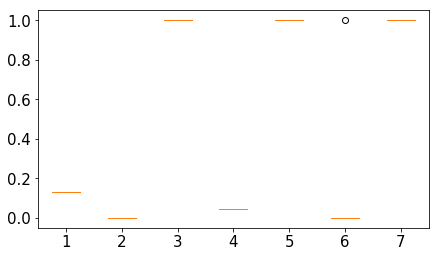

In [165]:
fig = plt.gcf()
fig.set_size_inches(7, 4)
labels, data = data_mb.keys(), data_mb.values()
plt.boxplot(data)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig('boxplot-musicbrainz.pdf')

In [1]:
data_linked = {}
for x in linkedmdb_rdfmt.values():
    for metric, data in x.iteritems():
        if not isinstance(data, numbers.Number) or not data <= 1:
            continue
        if metric == 'size_subjects' or metric == 'entities_2_5_lang' or metric == 'entities_11_50_lang' or metric == 'entities_6_10_lang':
            continue
        if metric in data_linked:
            data_linked[metric].append(data)
        else:
            data_linked[metric] = [data]

NameError: name 'linkedmdb_rdfmt' is not defined

In [8]:
fig = plt.gcf()
fig.set_size_inches(7, 4)
labels, data = data_linked.keys(), data_linked.values()
plt.boxplot(data)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig('boxplot-linkedmdb.pdf')

# Radar Chart

In [222]:
wikidata_rdfmt = json.load(open('../data/rdfmt/wikidata-rdfmt.json'))['wikidata']
dbpedia_rdfmt = json.load(open('../data/rdfmt/dbpedia-rdfmt.json'))['dbpedia']
yago_rdfmt = json.load(open('../data/rdfmt/yago-rdfmt.json'))['yago']
linkedmdb_rdfmt = json.load(open('../data/rdfmt/linkedmdb-rdfmt.json'))['linkedmdb']
musicbrainz_rdfmt = json.load(open('../data/rdfmt/musicbrainz-rdfmt.json'))['musicbrainz']

In [223]:
def get_average(rdfmt):
    data = {}
    d = {}
    for k,v in rdfmt.iteritems():
            for x,y in v.iteritems():
                if y == [] or y > 1 or x == 'size_subjects' or x == 'size_triples' or x == 'number_languages':
                    continue
                if x == 'languages_share':
                    print y.values()
                    if 'largest_language' in data:
                        data['largest_language'] = append(max(y.values()))
                    else: 
                        data['largest_language'] = [max(y.values())]
                    continue
                if x in data:
                    data[x].append(y)
                else:
                    data[x] = [y]
    for x,y in data.iteritems():
        d[x] = np.mean(y)
    return d

w_rdfmt = get_average(wikidata_rdfmt)
d_rdfmt = get_average(dbpedia_rdfmt)
y_rdfmt = get_average(yago_rdfmt)
m_rdfmt = get_average(musicbrainz_rdfmt)
l_rdfmt = get_average(linkedmdb_rdfmt)

In [224]:
data = ['Wikidata', 'DBpedia', 'YAGO', 'MusicBrainz', 'LinkedMDB']
keys = {}
for k in w_rdfmt.keys():
    keys[k] = [w_rdfmt[k], d_rdfmt[k], y_rdfmt[k], m_rdfmt[k], l_rdfmt[k]]

In [225]:
d = {}
d['group'] = data
d.update(keys)

df = pd.DataFrame(d)
print df

   ds_class_labeling  entities_11_50_lang  entities_1_lang  entities_2_5_lang  \
0           0.009695             0.218135         0.225104           0.306066   
1           0.000981             0.160993         0.540018           0.496922   
2           0.000001             0.216161         0.140607           0.461536   
3           0.129032             0.000000         1.000000           0.000000   
4           0.055556             0.000000         1.000000           0.000000   

   entities_50+_lang  entities_6_10_lang        group  subject_labeling  \
0           0.137226            0.113290     Wikidata          0.999821   
1           0.000000            0.266331      DBpedia          0.994199   
2           0.031442            0.150254         YAGO          1.000000   
3           0.000000            0.000000  MusicBrainz          0.083333   
4           0.000000            0.000000    LinkedMDB          1.000000   

   unambiguity  
0     1.000000  
1     1.000000  
2     0.324

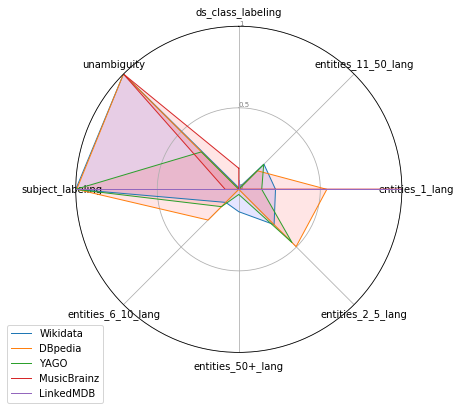

In [226]:
# ------- PART 1: Create background
from math import pi 
# number of variable
categories=list(df.drop('group', axis=1))
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.5,1], ["0","0.5","1"], color="grey", size=7)
plt.ylim(0,1)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
    
# Wikidata
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[0])
ax.fill(angles, values, 'b', alpha=0.1)
 
# DBpedia
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[1])
ax.fill(angles, values, 'r', alpha=0.1)

# YAGO
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[2])
ax.fill(angles, values, 'r', alpha=0.1)

# MusicBrainz
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[3])
ax.fill(angles, values, 'r', alpha=0.1)

# LinkedMDB
values=df.loc[4].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data[4])
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('radar-all.pdf')

[u'wikicat_Sinai_Beach_albums', u'wikicat_Polish_chess_writers', u'wikicat_South_Korean_pacifists', u'wikicat_Women_in_war_in_Southeast_Asia', u'wikicat_S.S._Villacidrese_Calcio_players', u'wikicat_Kinvara_hurlers', u'wikicat_Trigeminal_nerve_disorders', u'wikicat_Operatic_basses', u'wikicat_Welsh_people_of_Kashmiri_descent', u'wikicat_Government_buildings_in_Washington,_D.C.']
0.0140023544568
ds_class_labeling
1
unambiguity
0
subject_labeling


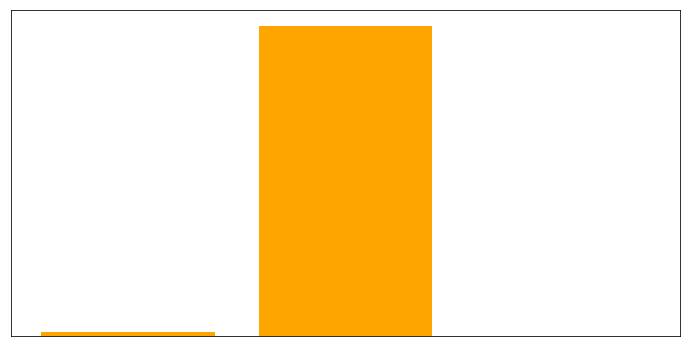

In [163]:
dbpedia_rdfmt['http://dbpedia.org/ontology/Location']
values = []
keys = []
ls = []
print yago_rdfmt.keys()[:10]
for k,v in yago_rdfmt['wikicat_Polish_chess_writers'].iteritems():
    if k != 'languages_share':
        if v <= 1:
            print v
            values.append(v)
            print k
            keys.append(k)
    else: 
        for lang,langv in v.iteritems():
            ls.append(langv)


#keys.append('languages')
x = np.arange(len(keys))
#width = 0.1
plt.bar(x, values, color='orange')
#for l in range(len(ls)):
#    if l > 0:
#        plt.bar(x, ls[l], width, bottom=ls[l - 1])
#    else: 
#        print ls[l]
#        plt.bar(x, ls[l])
    
plt.xticks([])
plt.yticks([])
plt.savefig('rdfmt-yago1.png')

# Ranking Results

In [63]:
results_multi = json.load(open('../results/experiment-results-multi.json'))['metrics_results']
print results_multi.keys()

[u'ndcg', u'kendalltau', u'rankedbiasoverlap', u'spearmanrho']


In [115]:
from matplotlib.colors import BoundaryNorm
def create_matrix(measure, two=False):
    results = {}
    for x in results_multi[measure]:
        for k,v in x.iteritems():
            k = k.replace('rdfmt', 'CLC')
            if two == True:
                v = v[0]
            if k in results:
                results[k].append(v)
            else:
                results[k] = [v]
    print results
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_yticklabels(['']+results.keys())
    ax.set_xticklabels([])

    for (i, j), z in np.ndenumerate(results.values()):
        #ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

    a=np.random.randn(2500).reshape((50,50))
    cmap = plt.get_cmap('Blues')
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize and forcing 0 to be part of the colorbar!
    bounds = np.arange(np.min(a),np.max(a),.5)
    idx=np.searchsorted(bounds,0)
    bounds=np.insert(bounds,idx,0)
    norm = BoundaryNorm(bounds, cmap.N)
    
    fig.set_size_inches(4, 4)
    
    ax.matshow(results.values(), cmap=cmap)#plt.cm.get_cmap('Blues', 6))
    plt.savefig(measure + '-results-matrix.pdf')



{u'CosN': [1.0, 0.9549549549549546, 0.5757575757575757, 0.5757575757575757, 0.5555555555555559], u'MSE': [0.46511627906976755, 0.8468468468468469, 0.6060606060606059, 0.5757575757575757, 0.3333333333333333], u'Cos': [0.4883720930232561, 0.391891891891892, 0.12121212121212124, 0.18181818181818163, 0.11111111111111131], u'NoCLC': [0.9767441860465119, 0.6846846846846848, 0.8181818181818182, 0.5757575757575757, 0.6666666666666666], u'CLC': [0.9767441860465119, 0.9549549549549546, 1.0, 0.9393939393939393, 1.0]}


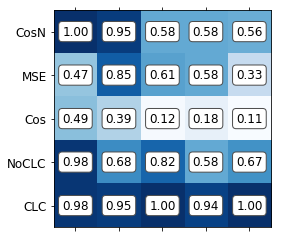

In [141]:
create_matrix('ndcg')

{u'CosN': [0.0, -0.39999999999999997, -0.19999999999999998, -0.19999999999999998, 0.0], u'MSE': [-0.19999999999999998, -0.19999999999999998, -0.39999999999999997, -0.19999999999999998, -0.39999999999999997], u'Cos': [-0.6, 0.39999999999999997, -0.9999999999999999, 0.39999999999999997, 0.39999999999999997], u'NoCLC': [-0.19999999999999998, -0.19999999999999998, 0.0, -0.19999999999999998, -0.19999999999999998], u'CLC': [0.7999999999999999, -0.39999999999999997, 0.9999999999999999, -0.39999999999999997, -0.39999999999999997]}


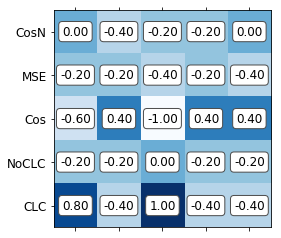

In [142]:
create_matrix('kendalltau', True)

{u'CosN': [0.98, 0.9902, 0.9702, 0.9702, 0.9637973333333333], u'MSE': [0.9526887066666666, 0.9790913733333333, 0.9590913733333333, 0.9702, 0.9428887066666666], u'Cos': [0.9539973333333333, 0.9637973333333333, 0.9539973333333333, 0.9637973333333333, 0.9637973333333333], u'NoCLC': [0.97529404, 0.9702, 0.98, 0.9702, 0.9702], u'CLC': [0.99529404, 0.9902, 1.0, 0.9902, 0.9902]}


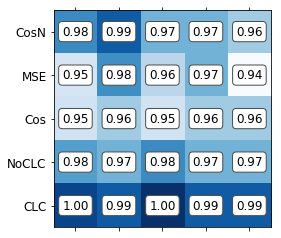

In [143]:
create_matrix('rankedbiasoverlap')

{u'CosN': [0.09999999999999999, -0.6, -0.3, -0.3, 0.0], u'MSE': [-0.49999999999999994, -0.19999999999999998, -0.49999999999999994, -0.3, -0.6], u'Cos': [-0.7, 0.6, -0.9999999999999999, 0.6, 0.6], u'NoCLC': [0.0, -0.3, 0.09999999999999999, -0.3, -0.3], u'CLC': [0.8999999999999998, -0.6, 0.9999999999999999, -0.6, -0.6]}


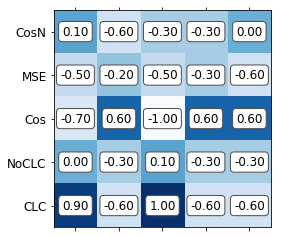

In [144]:
create_matrix('spearmanrho', True)

# Ranking results by domain

In [57]:
domainlocation = json.load(open('../results/domains/experiment-results-location.json'))
domainmovie = json.load(open('../results/domains/experiment-results-movie.json'))
domainmusic = json.load(open('../results/domains/experiment-results-music.json'))
domainpeople = json.load(open('../results/domains/experiment-results-people.json'))
domainsport = json.load(open('../results/domains/experiment-results-sport.json'))

In [170]:
domains = [domainlocation['metrics_results'], domainmovie['metrics_results'], domainmusic['metrics_results'], domainpeople['metrics_results'], domainsport['metrics_results']]

domaindata = {}
keys = domains[1].keys()

for key in keys:
    domaindata[key] = {}
    for x in domains:
        for y in x[key]:
            for k,v in y.iteritems():
                k = k.replace('rdfmt', 'CLC')
                if isinstance(v, list):
                    v = v[0]
                if not k in domaindata[key]:
                    domaindata[key][k] = [v]
                else:
                    domaindata[key][k].append(v)

In [181]:
def create_domain_matrix(measure):
    results = domaindata[measure]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_yticklabels(['']+results.keys())
    ax.set_xticklabels(['', 'location', 'movie', 'music', 'people', 'sport'])

    for (i, j), z in np.ndenumerate(results.values()):
        #ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

    a=np.random.randn(2500).reshape((50,50))
    cmap = plt.get_cmap('Blues')
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize and forcing 0 to be part of the colorbar!
    bounds = np.arange(np.min(a),np.max(a),.5)
    idx=np.searchsorted(bounds,0)
    bounds=np.insert(bounds,idx,0)
    norm = BoundaryNorm(bounds, cmap.N)
    
    fig.set_size_inches(4, 4)

    ax.matshow(results.values(), cmap=cmap)#plt.cm.get_cmap('Blues', 6))
    plt.savefig('domain-matrix-' + measure + '.pdf', bbox_inches='tight')

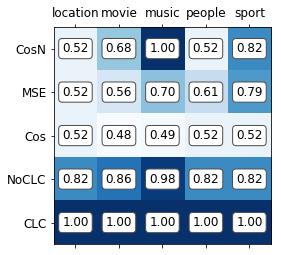

In [182]:
plt.rcParams.update({'font.size': 12})

create_domain_matrix('ndcg')

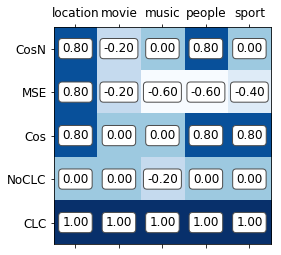

In [183]:
create_domain_matrix('kendalltau')

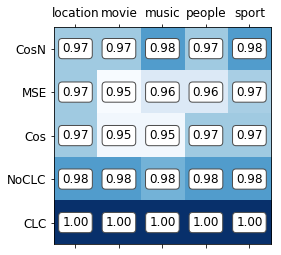

In [184]:
create_domain_matrix('rankedbiasoverlap')

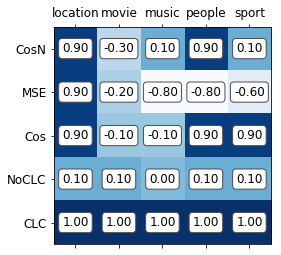

In [185]:
create_domain_matrix('spearmanrho')